檔案大小103720kb


In [72]:
from sklearn import preprocessing 

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import logging

In [73]:
from datetime import datetime

def date2DayOfWeek(s) :
    DayOfWeek = datetime.strptime(s, "%Y-%m-%d").weekday() + 1
    return DayOfWeek


In [74]:
logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s %(name)-12s %(levelname)-8s %(message)s',
                    datefmt='%m-%d %H:%M',
                    handlers = [logging.FileHandler('my.log', 'w', 'utf-8'),])
# 定義 handler 輸出 sys.stderr
console = logging.StreamHandler()
console.setLevel(logging.INFO)
# 設定輸出格式
formatter = logging.Formatter('%(name)-12s: %(levelname)-8s %(message)s')
# handler 設定輸出格式
console.setFormatter(formatter)
# 加入 hander 到 root logger
logging.getLogger('').addHandler(console)
 
# root 輸出
# logging.info('道可道非常道')

log_data = pd.read_csv("./new_data_download.csv")


In [75]:
df = pd.DataFrame(log_data)

dayOfWeek = []

for d in df.date:
    dayOfWeek.append(date2DayOfWeek(d))

# 新增星期欄位
df['dayOfWeek'] = dayOfWeek

df.to_csv('Result.csv',index=False)


# # # 將資料分開為 白天、下午、非上班、假日

In [76]:
# 非假日
df_work_day = df[(df['dayOfWeek'] != 6) & (df['dayOfWeek'] != 7) ]

#非假日早上
df_am = df_work_day[(df_work_day['time'] >= '07:15') & (df_work_day['time'] < '13:15')]
df_am.to_csv('df_am.csv',index=False)
# 非假日下午
df_pm = df_work_day[(df_work_day['time'] >= '13:15') & (df_work_day['time'] < '19:15')]
df_pm.to_csv('df_pm.csv',index=False)
# 非假日晚上
df_night_1 = df_work_day[(df_work_day['time'] >= '19:15') & (df_work_day['time'] < '23:59')]

df_night_2 = df_work_day[(df_work_day['time'] < '07:15')]

df_night = df_night_1.append(df_night_2)
df_night.to_csv('df_night.csv',index=False)

# 假日
df_holiday = df[(df['dayOfWeek'] == 6) | (df['dayOfWeek'] == 7) ]

df_holiday.to_csv('df_holiday.csv',index=False)

In [77]:
print('===========平日AM===========')
print(df_am.describe())
print('===========平日PM===========')
print(df_pm.describe())
print('===========平日非上班===========')
print(df_night.describe())
print('===========假日===========')
print(df_holiday.describe())

===========平日AM===========
       connection    download   dayOfWeek
count  131.000000  131.000000  131.000000
mean     0.872322   86.074792    2.419847
std      1.541786   35.600442    1.258535
min      0.421200   14.835600    1.000000
25%      0.460200   57.938500    1.000000
50%      0.483600   77.641300    2.000000
75%      0.530400  106.407800    3.000000
max     12.558000  200.288800    5.000000
===========平日PM===========
       connection    download   dayOfWeek
count  130.000000  130.000000  130.000000
mean     0.911760   90.096393    2.438462
std      2.095479   42.314174    1.299993
min      0.436800   13.041600    1.000000
25%      0.468000   58.215400    1.000000
50%      0.483600   73.936300    2.000000
75%      0.514800  110.619800    3.000000
max     23.041200  233.891200    5.000000
===========平日非上班===========
       connection    download   dayOfWeek
count  278.000000  278.000000  278.000000
mean     0.906876   61.293748    2.600719
std      1.734818   22.161219    1.3

In [78]:
# 上班時段
df_work_day = df_am.append(df_pm)
df_work_day.describe()

print('===========上班時段===========')
print(df_work_day.describe())


fliter = (df_work_day.download >= 108.685400)
df_work_busy = df_work_day[fliter]
df_work_busy.to_csv('df_work_busy.csv',index=False)

print('{}'.format('================================================='))
count = str(len(df_work_busy))
print("{} {}".format("總忙碌筆數：", count))
# 早上與下午忙碌的分布s
df_am = df_work_busy[(df_work_busy['time'] >= '07:15') & (df_work_busy['time'] < '13:15')]

print("{} {} {:.2f}%".format("白天忙碌筆數：", str(len(df_am))+'/'+ count, len(df_am)/int(count) * 100))
df_pm = df_work_busy[(df_work_busy['time'] >= '13:15') & (df_work_busy['time'] < '19:15')]
print("{} {} {:.2f}%".format("下午忙碌筆數：", str(len(df_pm))+'/'+ count, len(df_pm)/int(count) * 100))

# 週一到週五忙碌分布
print('{}'.format('================================================='))
df_1 = df_work_busy[(df_work_busy['dayOfWeek'] == 1)]
print("{} {} {:.2f}%".format("週一：", str(len(df_1)) + '/' + count, len(df_1)/int(count) * 100))
df_2 = df_work_busy[(df_work_busy['dayOfWeek'] == 2)]
print("{} {} {:.2f}%".format("週二：", str(len(df_2)) + '/' + count, len(df_2)/int(count) * 100))
df_3 = df_work_busy[(df_work_busy['dayOfWeek'] == 3)]
print("{} {} {:.2f}%".format("週三：", str(len(df_3)) + '/' + count, len(df_3)/int(count) * 100))
df_4 = df_work_busy[(df_work_busy['dayOfWeek'] == 4)]
print("{} {} {:.2f}%".format("週四：", str(len(df_4)) + '/' + count, len(df_4)/int(count) * 100))
df_5 = df_work_busy[(df_work_busy['dayOfWeek'] == 5)]
print("{} {} {:.2f}%".format("週五：", str(len(df_5)) + '/' + count, len(df_5)/int(count) * 100))

===========上班時段===========
       connection    download   dayOfWeek
count  261.000000  261.000000  261.000000
mean     0.891966   88.077888    2.429119
std      1.835094   39.065492    1.276923
min      0.421200   13.041600    1.000000
25%      0.468000   58.188100    1.000000
50%      0.483600   73.975300    2.000000
75%      0.514800  108.685400    3.000000
max     23.041200  233.891200    5.000000
總忙碌筆數： 66
白天忙碌筆數： 31/66 46.97%
下午忙碌筆數： 35/66 53.03%
週一： 17/66 25.76%
週二： 22/66 33.33%
週三： 16/66 24.24%
週四： 4/66 6.06%
週五： 7/66 10.61%


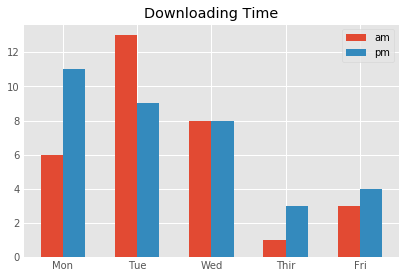

In [79]:
plt.style.use('ggplot')

plt.title('Downloading Time')

df_1_AM = df_1[(df_1['time'] < '13:15')]
df_1_PM = df_1[(df_1['time'] >= '13:15')]

df_2_AM = df_2[(df_2['time'] < '13:15')]
df_2_PM = df_2[(df_2['time'] >= '13:15')]

df_3_AM = df_3[(df_3['time'] < '13:15')]
df_3_PM = df_3[(df_3['time'] >= '13:15')]

df_4_AM = df_4[(df_4['time'] < '13:15')]
df_4_PM = df_4[(df_4['time'] >= '13:15')]

df_5_AM = df_5[(df_5['time'] < '13:15')]
df_5_PM = df_5[(df_5['time'] >= '13:15')]

x = ['Mon', 'Tue', 'Wed', 'Thir', 'Fri']

class_a = [len(df_1_AM), len(df_2_AM), len(df_3_AM), len(df_4_AM), len(df_5_AM)]
class_b = [len(df_1_PM), len(df_2_PM), len(df_3_PM), len(df_4_PM), len(df_5_PM)]

plt.bar(x, class_a, label = 'am', align = "edge", width = -0.3)
plt.bar(x, class_b, label = 'pm', align = "edge", width = 0.3)
plt.legend() #要使用label要加這行

# 柱狀圖

<BarContainer object of 5 artists>

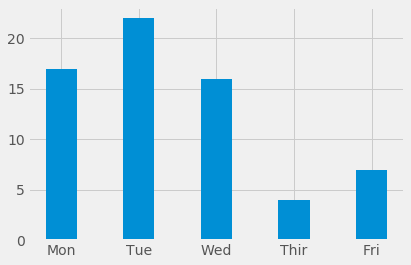

In [80]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
x = ['Mon', 'Tue', 'Wed', 'Thir', 'Fri']
class_a = [17, 22, 16, 4, 7]
plt.bar(x, class_a, label = 'class_a', width = 0.4)

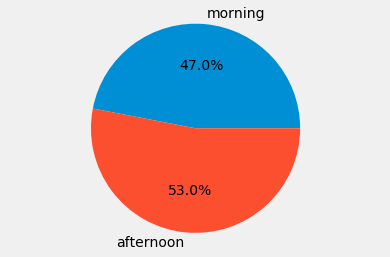

In [81]:
labels = ['morning', 'afternoon']
size = [46.97, 53.03]
plt.pie(size , labels = labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

matplotlib.font_manager: WARNING  findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
matplotlib.font_manager: WARNING  findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
matplotlib.font_manager: WARNING  findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
matplotlib.font_manager: WARNING  findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
matplotlib.font_manager: WARNING  findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
matplotlib.font_manager: WARNING  findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
matplotlib.font_manager: WARNING  findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
matplotlib.font_manager: WARNING  findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
matplotlib.font_manager: WARNING  findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
m

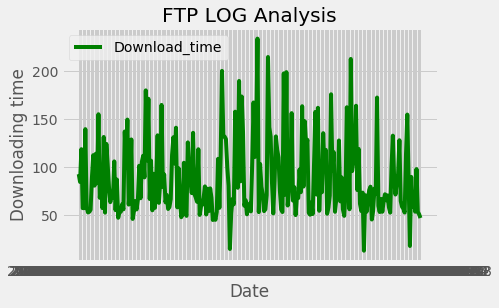

In [82]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


x_axix = df_work_day.date + df_work_day.time
train_acys = df_work_day.download

sub_axix = filter(lambda x:x%200 == 0, x_axix)
plt.title('FTP LOG Analysis')

plt.plot(x_axix, train_acys, color='green', label='Download_time')

plt.legend() # 显示图例
plt.xlabel('Date')
plt.ylabel('Downloading time')
plt.show()
#python 一个折线图绘制多个曲线

# Uploading Report

In [83]:
log_data = pd.read_csv("./new_data_upload.csv")

In [84]:
df = pd.DataFrame(log_data)

dayOfWeek = []

for d in df.date:
    dayOfWeek.append(date2DayOfWeek(d))

# 新增星期欄位
df['dayOfWeek'] = dayOfWeek

df.to_csv('Result_upload.csv',index=False)

In [85]:
# 非假日
df_work_day = df[(df['dayOfWeek'] != 6) & (df['dayOfWeek'] != 7) ]

#非假日早上
df_am = df_work_day[(df_work_day['time'] >= '07:15') & (df_work_day['time'] < '13:15')]
df_am.to_csv('df_am_upload.csv',index=False)
# 非假日下午
df_pm = df_work_day[(df_work_day['time'] >= '13:15') & (df_work_day['time'] < '19:15')]
df_pm.to_csv('df_pm_upload.csv',index=False)
# 非假日晚上
df_night_1 = df_work_day[(df_work_day['time'] >= '19:15') & (df_work_day['time'] < '23:59')]

df_night_2 = df_work_day[(df_work_day['time'] < '07:15')]

df_night = df_night_1.append(df_night_2)
df_night.to_csv('df_night_upload.csv',index=False)

# 假日
df_holiday = df[(df['dayOfWeek'] == 6) | (df['dayOfWeek'] == 7) ]

df_holiday.to_csv('df_holiday_upload.csv',index=False)

In [86]:
print('===========平日AM===========')
print(df_am.describe())
print('===========平日PM===========')
print(df_pm.describe())
print('===========平日非上班===========')
print(df_night.describe())
print('===========假日===========')
print(df_holiday.describe())

===========平日AM===========
       connection      upload   dayOfWeek
count  130.000000  130.000000  130.000000
mean     0.875312  492.952076    2.423077
std      1.547369   67.612535    1.262859
min      0.421200  393.573100    1.000000
25%      0.456300  444.335600    1.000000
50%      0.483600  482.321600    2.000000
75%      0.530400  531.027250    3.000000
max     12.558000  849.078300    5.000000
===========平日PM===========
       connection      upload   dayOfWeek
count  126.000000  126.000000  126.000000
mean     0.916933  497.526095    2.460317
std      2.127188   70.826819    1.306297
min      0.436800  398.190700    1.000000
25%      0.468000  441.203900    1.000000
50%      0.483600  483.070400    2.000000
75%      0.510900  539.901300    3.000000
max     23.041200  696.026400    5.000000
===========平日非上班===========
       connection       upload   dayOfWeek
count  279.000000   279.000000  279.000000
mean     0.905359   417.364419    2.594982
std      1.731880    86.121342   

In [87]:
# 上班時段
df_work_day = df_am.append(df_pm)
df_work_day.describe()

print('===========上班時段===========')
print(df_work_day.describe())


fliter = (df_work_day.upload >= 537.436500)
df_work_busy = df_work_day[fliter]
df_work_busy.to_csv('df_work_busy_upload.csv',index=False)

print('{}'.format('================================================='))
count = str(len(df_work_busy))
print("{} {}".format("總忙碌筆數：", count))
# 早上與下午忙碌的分布s
df_am = df_work_busy[(df_work_busy['time'] >= '07:15') & (df_work_busy['time'] < '13:15')]

print("{} {} {:.2f}%".format("白天忙碌筆數：", str(len(df_am))+'/'+ count, len(df_am)/int(count) * 100))
df_pm = df_work_busy[(df_work_busy['time'] >= '13:15') & (df_work_busy['time'] < '19:15')]
print("{} {} {:.2f}%".format("下午忙碌筆數：", str(len(df_pm))+'/'+ count, len(df_pm)/int(count) * 100))

# 週一到週五忙碌分布
print('{}'.format('================================================='))
df_1 = df_work_busy[(df_work_busy['dayOfWeek'] == 1)]
print("{} {} {:.2f}%".format("週一：", str(len(df_1)) + '/' + count, len(df_1)/int(count) * 100))
df_2 = df_work_busy[(df_work_busy['dayOfWeek'] == 2)]
print("{} {} {:.2f}%".format("週二：", str(len(df_2)) + '/' + count, len(df_2)/int(count) * 100))
df_3 = df_work_busy[(df_work_busy['dayOfWeek'] == 3)]
print("{} {} {:.2f}%".format("週三：", str(len(df_3)) + '/' + count, len(df_3)/int(count) * 100))
df_4 = df_work_busy[(df_work_busy['dayOfWeek'] == 4)]
print("{} {} {:.2f}%".format("週四：", str(len(df_4)) + '/' + count, len(df_4)/int(count) * 100))
df_5 = df_work_busy[(df_work_busy['dayOfWeek'] == 5)]
print("{} {} {:.2f}%".format("週五：", str(len(df_5)) + '/' + count, len(df_5)/int(count) * 100))

===========上班時段===========
       connection      upload   dayOfWeek
count  256.000000  256.000000  256.000000
mean     0.895798  495.203351    2.441406
std      1.851971   69.115167    1.282034
min      0.421200  393.573100    1.000000
25%      0.468000  442.358300    1.000000
50%      0.483600  482.633600    2.000000
75%      0.514800  537.436500    3.000000
max     23.041200  849.078300    5.000000
總忙碌筆數： 64
白天忙碌筆數： 29/64 45.31%
下午忙碌筆數： 35/64 54.69%
週一： 19/64 29.69%
週二： 17/64 26.56%
週三： 16/64 25.00%
週四： 6/64 9.38%
週五： 6/64 9.38%


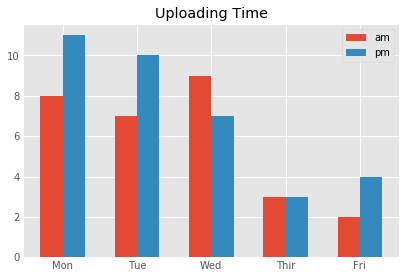

In [88]:
plt.style.use('ggplot')

plt.title('Uploading Time')

df_1_AM = df_1[(df_1['time'] < '13:15')]
df_1_PM = df_1[(df_1['time'] >= '13:15')]

df_2_AM = df_2[(df_2['time'] < '13:15')]
df_2_PM = df_2[(df_2['time'] >= '13:15')]

df_3_AM = df_3[(df_3['time'] < '13:15')]
df_3_PM = df_3[(df_3['time'] >= '13:15')]

df_4_AM = df_4[(df_4['time'] < '13:15')]
df_4_PM = df_4[(df_4['time'] >= '13:15')]

df_5_AM = df_5[(df_5['time'] < '13:15')]
df_5_PM = df_5[(df_5['time'] >= '13:15')]

x = ['Mon', 'Tue', 'Wed', 'Thir', 'Fri']

class_a = [len(df_1_AM), len(df_2_AM), len(df_3_AM), len(df_4_AM), len(df_5_AM)]
class_b = [len(df_1_PM), len(df_2_PM), len(df_3_PM), len(df_4_PM), len(df_5_PM)]

plt.bar(x, class_a, label = 'am', align = "edge", width = -0.3)
plt.bar(x, class_b, label = 'pm', align = "edge", width = 0.3)
plt.legend() #要使用label要加這行


<BarContainer object of 5 artists>

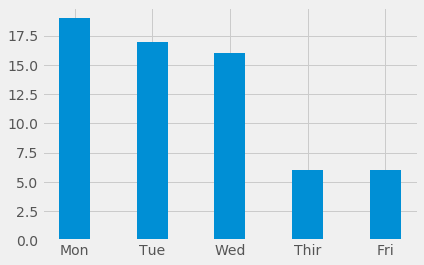

In [89]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
x = ['Mon', 'Tue', 'Wed', 'Thir', 'Fri']
class_a = [19, 17, 16, 6, 6]
plt.bar(x, class_a, label = 'class_a', width = 0.4)

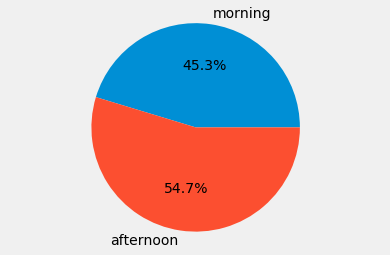

In [90]:
labels = ['morning', 'afternoon']
size = [45.31, 54.69]
plt.pie(size , labels = labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

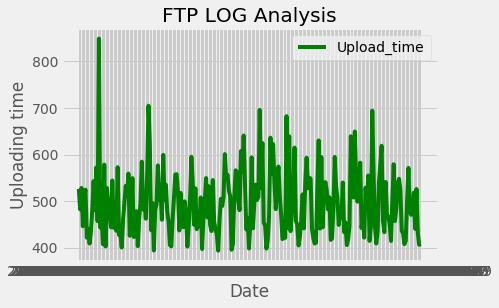

In [91]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


x_axix = df_work_day.date + df_work_day.time
train_acys = df_work_day.upload

sub_axix = filter(lambda x:x%200 == 0, x_axix)
plt.title('FTP LOG Analysis')

plt.plot(x_axix, train_acys, color='green', label='Upload_time')

plt.legend() # 显示图例
plt.xlabel('Date')
plt.ylabel('Uploading time')
plt.show()
#python 一个折线图绘制多个曲线